No handlers could be found for logger "poloniex"



Running ml_xgb
precision_score:0.812785388128
f1_score:0.733264675592

Running ml_randfor
precision_score:0.834158415842
f1_score:0.71931696905

Running ml_stacking
task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    ----
    MEAN:     [0.67025620] + [0.01212538]
    FULL:     [0.67041707]

model  1:     [MLPClassifier]
    ----
    MEAN:     [0.68361184] + [0.00743071]
    FULL:     [0.68364446]

model  2:     [KNeighborsClassifier]
    ----
    MEAN:     [0.67286549] + [0.00890873]
    FULL:     [0.67289251]

precision_score:0.795294117647
f1_score:0.713080168776

Running ml_mlpc
precision_score:0.798206278027
f1_score:0.727272727273

Running ml_logreg
precision_score:0.788259958071
f1_score:0.744554455446

	USDT_BTC

Retorno del mercacdo: 2.13647752676
Retorno ml_xgb 42.5551696942
Retorno ml_randfor 32.5981292288
Retorno ml_stacking 38.2958956952
Retorno ml_mlpc 40.57774

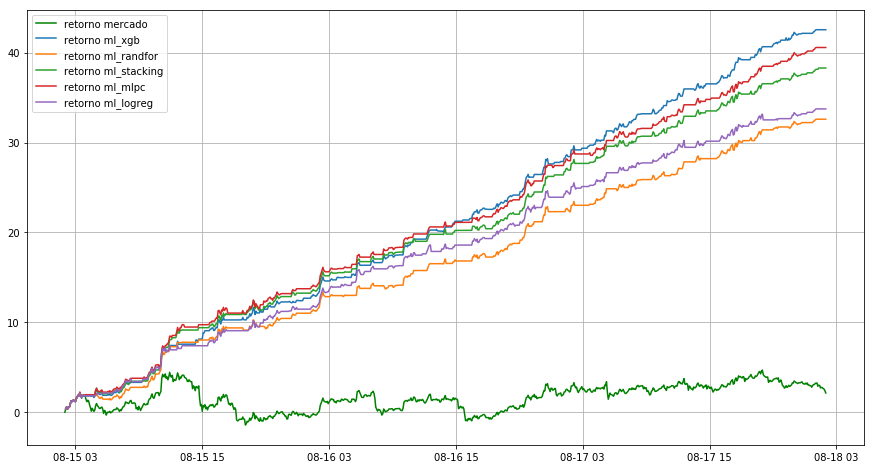

In [5]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_BTC"


start=string2ts("2018-08-15 02:00:00")
end=string2ts("2018-08-18 02:00:00")
period=3600/12

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

per = 0.95
cum_return1 = marketReturn(df["close"]) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,c=1.7)

from profit import profit,profit2

start2 = ml_init_time(end,start,per)

df12 = prepareData(pair=pair, start=start2, end=end, period=period)

# "ml_stacking",
# "ml_randfor", "ml_xgb",
strategies = ["ml_xgb", "ml_randfor", "ml_stacking", "ml_mlpc", "ml_logreg"]

list_profit = []
list_v = []
ws = []


for strategy in strategies:
    
    print "\nRunning",strategy
    w, t = run_strategy(strategy, df12, pair, True, per, la=11)
    relativeReturn,v = profit(w)
    
    ws.append(w)
    list_profit.append(relativeReturn)
    list_v.append(v)

    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
for i, strategy in enumerate(strategies):
    print "Retorno", strategy, list_profit[i]*100

plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
for i, strategy in enumerate(strategies):
    
    plt.plot(df12.index[int(len(df12)*per):],list_v[i]*100,label='retorno '+strategy)

plt.legend(loc='best')
plt.grid()

In [2]:
ws[0][["w"]].tail()

,w
date,
2018-08-18 01:40:00,0.0
2018-08-18 01:45:00,0.0
2018-08-18 01:50:00,0.0
2018-08-18 01:55:00,0.0
2018-08-18 02:00:00,0.0


In [3]:
for la in range(3, 20):
    print "la:", la
    w, t = run_strategy("ml_mlpc", df12, pair, True, per, la=la)
    relativeReturn,v = profit(w)
    print relativeReturn*100

la: 3
precision_score:0.752173913043
f1_score:0.696878147029
64.7978845368
la: 4
precision_score:0.778494623656
f1_score:0.725450901804
59.8694912541
la: 5
precision_score:0.7805907173
f1_score:0.734856007944
56.6288798932
la: 6
precision_score:0.785087719298
f1_score:0.723963599596
52.073482385
la: 7
precision_score:0.799107142857
f1_score:0.729867482161
49.313520299
la: 8
precision_score:0.787418655098
f1_score:0.730382293763
47.6110160623
la: 9
precision_score:0.792494481236
f1_score:0.728194726166
42.4808375844
la: 10
precision_score:0.79443254818
f1_score:0.742
42.6381270254
la: 11
precision_score:0.798206278027
f1_score:0.727272727273
40.5777488261
la: 12
precision_score:0.793333333333
f1_score:0.726347914547
38.681872675
la: 13
precision_score:0.789237668161
f1_score:0.719101123596
34.8108793297
la: 14
precision_score:0.792576419214
f1_score:0.732593340061
36.3846297303
la: 15
precision_score:0.799554565702
f1_score:0.73116089613
36.3556552617
la: 16
precision_score:0.7924107142